In [18]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


# Exploring Function Minimization

Today we discussed how learning a set of parameters can be treated as the task of minimizing an error function. Scipy privides a number of ways of finding minima of functions. We'll test one of them.

In [20]:
import numpy
from scipy.optimize import fmin_bfgs, fmin

#### Background using minimizer functions
We will use the function `fmin_bfgs` uses the method called 
[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm).
We need to give it the following arguments:
- f: the function to minimize
- x0: the initial guess of the argument with respect to which we're minimizing
- fprime: the first derivative of f. If we omit it, `fmin_bfgs` will use a numerical approximatiom

For example, consider the following polynomial function: $f(x) = x^4 - 10x^3 + x^2 + x - 4$



In [22]:
def f(x):
    return x**4 - 10*x**3 + x**2 + x -4

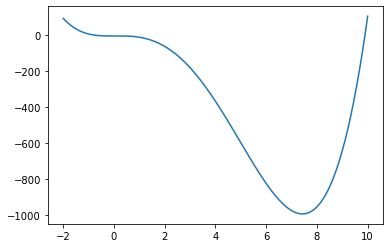

In [24]:
x = numpy.linspace(-2,10,1000)
pylab.plot(x,f(x))

Let's find the minimum, using 0 as a starting point

In [26]:
print(fmin_bfgs(f, x0=0))

Optimization terminated successfully.
         Current function value: -4.093250
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8
[-0.15101746]


We can suppress the messages using disp=False and look only at the minimum of the input function

In [28]:
print(fmin_bfgs(f, x0=0, disp=False))

[-0.15101746]


### Exercise 1
We want to check and see if our function has gotten stuck at a local miniumum. Print the values of the x where f(x) has a minimum findable using the following starting points: -2, 0, 2, 6, 10

In [30]:
#your code here



We can also use `fmin_bfgs` to minimize functions which take vectors rather than single numbers. For example, let's find the $x_1$ and $x_2$ which minimize the function $g(\mathbf{x}) = x_1^2 + x_2^2$ .

In [32]:
def g(x):
    return (x**2).sum()
x0 = numpy.array([-1, -1])
x1 = numpy.array([1,1])
print("Starting at {} found minimum at {}".format(x0, fmin_bfgs(g, x0=x0, disp=False)))
print("Starting at {} found minimum at {}".format(x0, fmin_bfgs(g, x0=x1, disp=False)))

Starting at [-1 -1] found minimum at [-7.13245452e-09 -7.13245452e-09]
Starting at [-1 -1] found minimum at [-1.07505143e-08 -1.07505143e-08]


### Exercise 2

In this exercise we will regress the fourth feature of the iris dataset against the first three, using error function minimization. We first prepare the data for you. We encourage you to inspect it so you understand how it was loaded.

#### Steps
1. Define an error function that returns the error as a function of intercept and coefficients. I.e ```y = xb + a + e```
2. Error function should return the sum of squared error. Hint: this function will be passed into ```fmin_bfgs```, use X_train, Y_train as part of the function.
3. Define a starting point for the intercept and coefficents
4. Find values that minimize error

In [33]:
#load iris data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_val, y_train, y_val = train_test_split(iris.data[:,:3], 
                                                  iris.data[:,3], 
                                                  test_size=1/3, 
                                                  random_state=999)

In [34]:
#define an error function


Let's define a starting point for the intercept and coefficients

In [35]:
#define an array of starting points for the coefficients a, b



In [36]:
#find the values that minimize the error

print(wb_min)

NameError: name 'wb_min' is not defined

### Exercise 3

Check how well these parameters do on validation data, in terms of mean absolute error and r-squared. 

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error
#your code here


0.167757997204
0.914864382525


### Exercise 4
Compare these results with the classic implementation of linear regression

In [16]:
from sklearn.linear_model import LinearRegression
#your code here


-0.278995856785 [-0.22846195  0.25409292  0.53891441]
0.167758010212
0.914864399764
